### Student Information
Name: 簡佩如

Student ID: 108070025

GitHub ID: 86679739

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

In [2]:
### Begin Assignment Here

_____
## 2. Second: 
follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

## 1. The Data

In [3]:
# get data amazon_cells_labelled.txt
path ="sentiment labelled sentences\\amazon_cells_labelled.txt"
f = open(path, 'r')
amazon_cells_labelled = f.read()
f.close()

In [4]:
# get data imdb_labelled.txt
path ="sentiment labelled sentences\imdb_labelled.txt"
f = open(path, 'r')
imdb_labelled = f.read()
f.close()

In [5]:
# get data yelp_labelled.txt
path ="sentiment labelled sentences\yelp_labelled.txt"
f = open(path, 'r')
yelp_labelled = f.read()
f.close()

## 2. Data Preparation
* 目標是把資料轉成 dataframe

In [6]:
# categories
categories = ['amazon_cells_labelled', 'imdb_labelled', 'yelp_labelled']

In [7]:
all_data = amazon_cells_labelled + imdb_labelled + yelp_labelled

In [8]:
print("\n".join(all_data.split("\t1")))

So there is no way for me to plug it in here in the US unless I go by a converter.	0
Good case, Excellent value.

Great for the jawbone.

Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!	0
The mic is great.

I have to jiggle the plug to get it to line up right to get decent volume.	0
If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.	0
If you are Razr owner...you must have this!

Needless to say, I wasted my money.	0
What a waste of money and time!.	0
And the sound quality is great.

He was very impressed when going from the original battery to the extended battery.

If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.	0
Very good quality though

The design is very odd, as the ear "clip" is not very comfortable at all.	0
Highly recommend for any one who has a blue tooth phone.

I advise EVERYONE DO NOT BE FOOLED!	0
So Far So Good!.

W

### ** >>> Exercise 1 (5 min): **  
* 原本的題目: In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)
* 因為這裡的 raw data 是 string ， 所以我印前個char。

In [9]:
all_data[:3]

'So '

## 3. Data Transformation

### 3.1 Converting Dictionary into Pandas Dataframe

In [10]:
import pandas as pd

# my functions
# 我把 helpers 的函式直接貼到這裡，這樣比較好改
def format_rows(docs):
    """ format the text field and strip special characters """
    tmp_str = []
    for i in docs.split("\n"):
        tmp_str.append(str(i))

    tmp_list = []
    for i in tmp_str:
        tmp_list.append(list(i.split('\t')))

    return tmp_list  

format_rows(all_data)
X = pd.DataFrame.from_records(format_rows(all_data), columns= ['sentence','score'])
X

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0
2999,"Then, as if I hadn't wasted enough of my life ...",0


### Adding Columns

In [11]:
X =  X.iloc[:-1]

In [12]:
# add category label also
category_name_list =  [categories[0]]*1000 + [categories[1]]*1000 + [categories[2]]*1000 
X['category_name']  = category_name_list

C:\Users\penny\AppData\Local\Temp\ipykernel_26116\1946601015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['category_name']  = category_name_list


In [13]:
X[0:10]

,sentence,score,category_name
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled
1,"Good case, Excellent value.",1,amazon_cells_labelled
2,Great for the jawbone.,1,amazon_cells_labelled
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled
4,The mic is great.,1,amazon_cells_labelled
5,I have to jiggle the plug to get it to line up...,0,amazon_cells_labelled
6,If you have several dozen or several hundred c...,0,amazon_cells_labelled
7,If you are Razr owner...you must have this!,1,amazon_cells_labelled
8,"Needless to say, I wasted my money.",0,amazon_cells_labelled
9,What a waste of money and time!.,0,amazon_cells_labelled


### 3.2 Familiarizing yourself with the Data

In [14]:
# a simple query
X[:10][["sentence","category_name"]]

,sentence,category_name
0,So there is no way for me to plug it in here i...,amazon_cells_labelled
1,"Good case, Excellent value.",amazon_cells_labelled
2,Great for the jawbone.,amazon_cells_labelled
3,Tied to charger for conversations lasting more...,amazon_cells_labelled
4,The mic is great.,amazon_cells_labelled
5,I have to jiggle the plug to get it to line up...,amazon_cells_labelled
6,If you have several dozen or several hundred c...,amazon_cells_labelled
7,If you are Razr owner...you must have this!,amazon_cells_labelled
8,"Needless to say, I wasted my money.",amazon_cells_labelled
9,What a waste of money and time!.,amazon_cells_labelled


#### Let's query the last 10 records

In [15]:
X[-10:]

,sentence,score,category_name
2990,The refried beans that came with my meal were ...,0,yelp_labelled
2991,Spend your money and time some place else.,0,yelp_labelled
2992,A lady at the table next to us found a live gr...,0,yelp_labelled
2993,the presentation of the food was awful.,0,yelp_labelled
2994,I can't tell you how disappointed I was.,0,yelp_labelled
2995,I think food should have flavor and texture an...,0,yelp_labelled
2996,Appetite instantly gone.,0,yelp_labelled
2997,Overall I was not impressed and would not go b...,0,yelp_labelled
2998,"The whole experience was underwhelming, and I ...",0,yelp_labelled
2999,"Then, as if I hadn't wasted enough of my life ...",0,yelp_labelled


In [16]:
# using loc (by label)
X.loc[:10, 'sentence']

0     So there is no way for me to plug it in here i...
1                           Good case, Excellent value.
2                                Great for the jawbone.
3     Tied to charger for conversations lasting more...
4                                     The mic is great.
5     I have to jiggle the plug to get it to line up...
6     If you have several dozen or several hundred c...
7           If you are Razr owner...you must have this!
8                   Needless to say, I wasted my money.
9                      What a waste of money and time!.
10                      And the sound quality is great.
Name: sentence, dtype: object

In [17]:
# using iloc (by position)
X.iloc[:10, 0]

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: sentence, dtype: object

###  >>> **Exercise 2 (take home)**: 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [18]:
X.query('"amazon_cells_labelled" in category_name')

,sentence,score,category_name
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled
1,"Good case, Excellent value.",1,amazon_cells_labelled
2,Great for the jawbone.,1,amazon_cells_labelled
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled
4,The mic is great.,1,amazon_cells_labelled
...,...,...,...
995,The screen does get smudged easily because it ...,0,amazon_cells_labelled
996,What a piece of junk.. I lose more calls on th...,0,amazon_cells_labelled
997,Item Does Not Match Picture.,0,amazon_cells_labelled
998,The only thing that disappoint me is the infra...,0,amazon_cells_labelled


###  >>> **Exercise 3 (5 min)**  : 

In [19]:
X.query('category_name == "yelp_labelled"')

,sentence,score,category_name
2000,Wow... Loved this place.,1,yelp_labelled
2001,Crust is not good.,0,yelp_labelled
2002,Not tasty and the texture was just nasty.,0,yelp_labelled
2003,Stopped by during the late May bank holiday of...,1,yelp_labelled
2004,The selection on the menu was great and so wer...,1,yelp_labelled
...,...,...,...
2995,I think food should have flavor and texture an...,0,yelp_labelled
2996,Appetite instantly gone.,0,yelp_labelled
2997,Overall I was not impressed and would not go b...,0,yelp_labelled
2998,"The whole experience was underwhelming, and I ...",0,yelp_labelled


## 4. Data Mining using Pandas

### 4.1 Missing Values

In [20]:
# check missing values
X.isnull()

,sentence,score,category_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2995,False,False,False
2996,False,False,False
2997,False,False,False
2998,False,False,False


In [21]:
def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amoung of missing records is: ", counter)


X.isnull().apply(lambda x: check_missing_values(x))

,sentence,score,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [22]:
X.T.isnull().apply(lambda x: check_missing_values(x)).T

,0,1
0,The amoung of missing records is:,0
1,The amoung of missing records is:,0
2,The amoung of missing records is:,0
3,The amoung of missing records is:,0
4,The amoung of missing records is:,0
...,...,...
2995,The amoung of missing records is:,0
2996,The amoung of missing records is:,0
2997,The amoung of missing records is:,0
2998,The amoung of missing records is:,0


In [23]:
X

,sentence,score,category_name
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled
1,"Good case, Excellent value.",1,amazon_cells_labelled
2,Great for the jawbone.,1,amazon_cells_labelled
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled
4,The mic is great.,1,amazon_cells_labelled
...,...,...,...
2995,I think food should have flavor and texture an...,0,yelp_labelled
2996,Appetite instantly gone.,0,yelp_labelled
2997,Overall I was not impressed and would not go b...,0,yelp_labelled
2998,"The whole experience was underwhelming, and I ...",0,yelp_labelled


In [24]:
dummy_series = pd.Series(["dummy_record", 1], index=["sentence", "score"])

In [25]:
dummy_series

sentence    dummy_record
score                  1
dtype: object

In [26]:
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose

,sentence,score
0,dummy_record,1


In [27]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [28]:
# check if the records was commited into result
len(result_with_series)

3001

In [29]:
result_with_series.isnull().apply(lambda x: check_missing_values(x))

,sentence,score,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [30]:
# dummy record as dictionary format
dummy_dict = [{'sentence': 'dummy_record',
               'score': 1
              }]

In [31]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [32]:
len(X)

3001

In [33]:
X.isnull().apply(lambda x: check_missing_values(x))

,sentence,score,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [34]:
X.dropna(inplace=True)

In [35]:
X.isnull().apply(lambda x: check_missing_values(x))

,sentence,score,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [36]:
len(X)

3000

### >>> **Exercise 5 (take home)** 
跟新data沒有關係，所以pass

### 4.2 Dealing with Duplicate Data
Dealing with duplicate data is just as painful as dealing with missing data. The worst case is that you have duplicate data that has missing values. But let us not get carried away. Let us stick with the basics. As we have learned in our Data Mining course, duplicate data can occur because of many reasons. The majority of the times it has to do with how we store data or how we collect and merge data. For instance, we may have collected and stored a tweet, and a retweet of that same tweet as two different records; this results in a case of data duplication; the only difference being that one is the original tweet and the other the retweeted one. Here you will learn that dealing with duplicate data is not as challenging as missing values. But this also all depends on what you consider as duplicate data, i.e., this all depends on your criteria for what is considered as a duplicate record and also what type of data you are dealing with. For textual data, it may not be so trivial as it is for numerical values or images. Anyhow, let us look at some code on how to deal with duplicate records in our `X` dataframe.

In [37]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [38]:
sum(X.duplicated()) # 有 17 個重複的

17

In [39]:
sum(X.duplicated('sentence'))

17

In [40]:
X

,sentence,score,category_name
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled
1,"Good case, Excellent value.",1,amazon_cells_labelled
2,Great for the jawbone.,1,amazon_cells_labelled
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled
4,The mic is great.,1,amazon_cells_labelled
...,...,...,...
2995,I think food should have flavor and texture an...,0,yelp_labelled
2996,Appetite instantly gone.,0,yelp_labelled
2997,Overall I was not impressed and would not go b...,0,yelp_labelled
2998,"The whole experience was underwhelming, and I ...",0,yelp_labelled


In [41]:
dummy_duplicate_dict = [{
                             'sentence': 'dummy record',
                             'score': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'sentence': 'dummy record',
                             'score': 1, 
                             'category_name': "dummy category"
                        }]

In [42]:
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

In [43]:
len(X)

3002

In [44]:
sum(X.duplicated('sentence')) # 增加到有 18 個重複的

18

In [45]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [46]:
len(X)

2966

## 5.  Data Preprocessing

### 5.1 Sampling

In [47]:
X_sample = X.sample(n=1000) #random state

In [48]:
len(X_sample)

1000

In [49]:
X_sample[0:4]

,sentence,score,category_name
433,I highly recommend this modest priced cellular...,1,amazon_cells_labelled
2468,"Love the margaritas, too!",1,yelp_labelled
1978,Then I watched it again two Sundays ago (March...,1,imdb_labelled
258,Excellent hands free tool.,1,amazon_cells_labelled


### >>> Exercise 6 (take home):
跟作業一樣所以pass!

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
categories

['amazon_cells_labelled', 'imdb_labelled', 'yelp_labelled']

imdb_labelled            994
yelp_labelled            992
amazon_cells_labelled    980
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

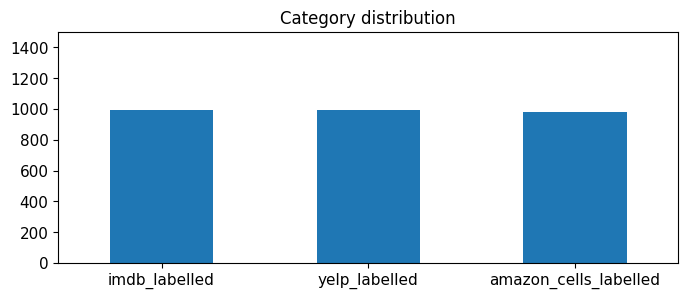

In [52]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 1500],  # 原本的 650 太小了，所以我改成1500      
                                    rot = 0, fontsize = 11, figsize = (8,3))

imdb_labelled            339
amazon_cells_labelled    337
yelp_labelled            324
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

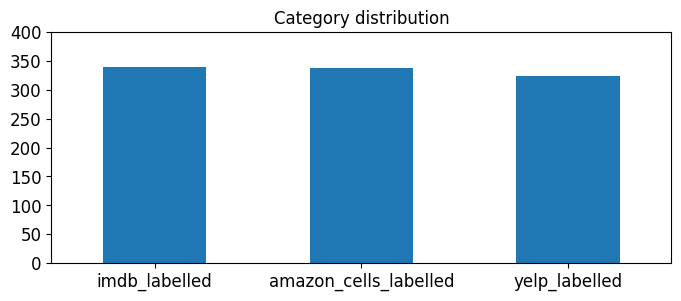

In [53]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 400], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

imdb_labelled            339
amazon_cells_labelled    337
yelp_labelled            324
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

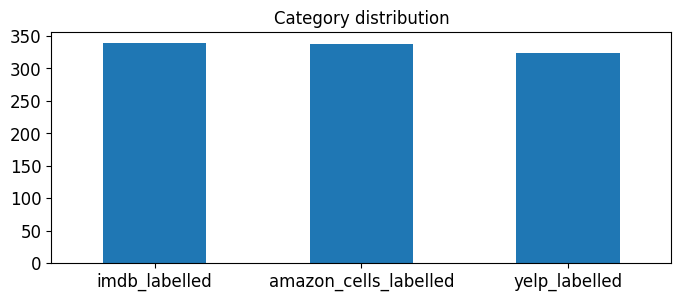

In [54]:
# plot barchart for X_sample
print(X_sample.category_name.value_counts())

X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
#                                            ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

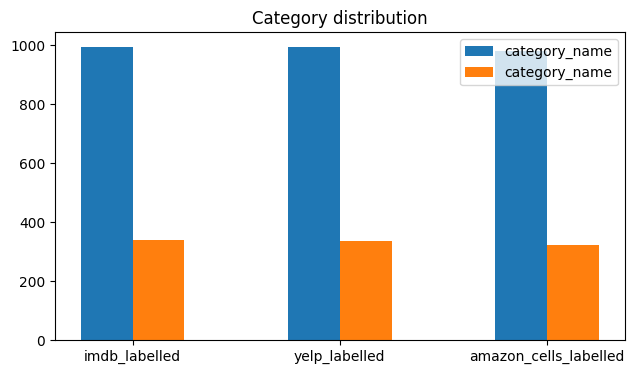

In [55]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(25, 4))
# 构造x轴刻度标签、数据
labels = X.category_name.value_counts().index.to_list()
first = X.category_name.value_counts().to_list()
second = X_sample.category_name.value_counts().to_list()

# 两组数据
plt.subplot(131)
x = np.arange(len(labels))  # x轴刻度标签位置
width = 0.25  # 柱子的宽度
# 计算每个柱子在x轴上的位置，保证x轴刻度标签居中
# x - width/2，x + width/2即每组数据在x轴上的位置
plt.bar(x - width/2, first, width, label='category_name')
plt.bar(x + width/2, second, width, label='category_name')
plt.title('Category distribution')
# x轴刻度标签位置不进行计算
plt.xticks(x, labels=labels)
plt.legend()

plt.show()

### 5.2 Feature Creation

In [56]:
import nltk

In [57]:
# takes a like a minute or two to process
def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

X['unigrams'] = X['sentence'].apply(lambda x: tokenize_text(x))

In [58]:
X[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [59]:
X[0:4]

,sentence,score,category_name,unigrams
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon_cells_labelled,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,amazon_cells_labelled,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled,"[Tied, to, charger, for, conversations, lastin..."


In [60]:
list(X[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### 5.3 Feature subset selection

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentence) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 4163)	1
  (0, 4547)	1
  (0, 2427)	1
  (0, 3044)	1
  (0, 4989)	1
  (0, 1829)	1
  (0, 2810)	1
  (0, 4611)	1
  (0, 3387)	1
  (0, 2433)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4533)	1
  (0, 4837)	1
  (0, 4795)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [62]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [63]:
analyze(" ".join(list(X[:1].sentence)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [64]:
# We can check the shape of this matrix by:
X_counts.shape

(2966, 5157)

In [65]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [66]:
X_counts.shape

(2966, 5157)

In [67]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [68]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

### **>>> Exercise 10 (take home):**
* 原本 lab的題目: We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.
* 這邊我用找任何1代替


In [69]:
item = X_counts[1, 0:1000].toarray()[0]
item_index = np.where(item == 1)    #查找元素值為1的位置
count_vect.get_feature_names_out()[item_index][-1] #第一個是前面看到的00 最後一個才是中間那個1

'case'

In [70]:
item_index

(array([713], dtype=int64),)

In [71]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[700:720]]

In [72]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[700:720]]

In [73]:
plot_z = X_counts[700:720, 700:720].toarray()
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

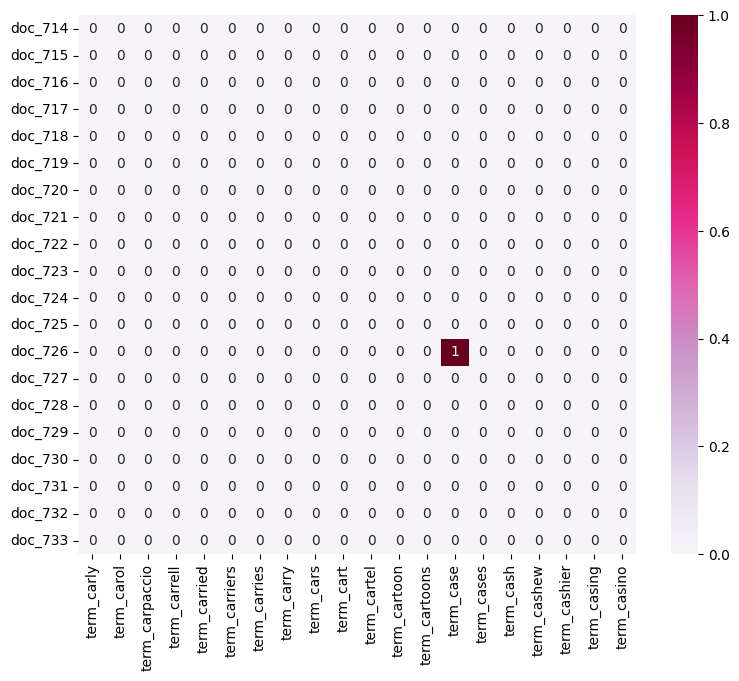

In [74]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (take home):** 

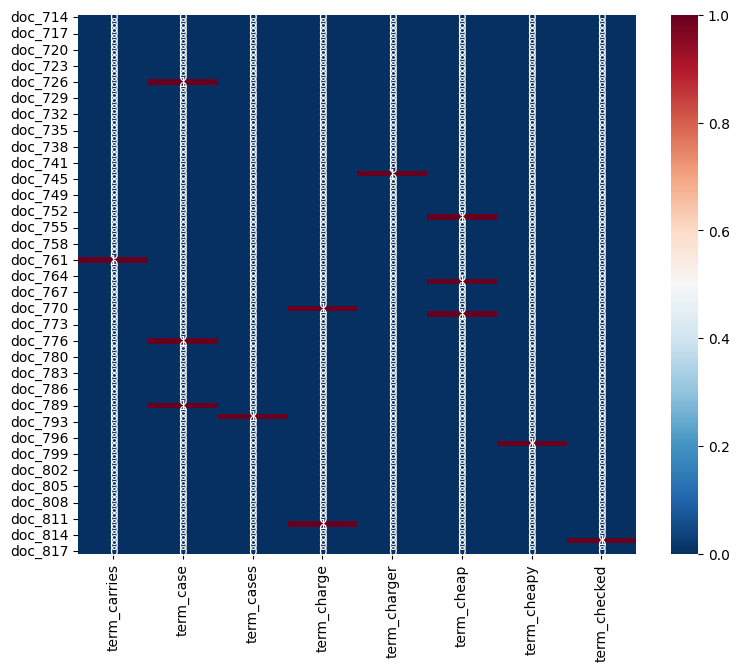

In [75]:
idx = np.argwhere(np.all( X_counts[700:800,700:800].toarray()== 0, axis=0)) 
X_counts_table = np.delete(X_counts[700:800,700:800].toarray(), idx, axis = 1)
count_vect_string = np.delete(count_vect.get_feature_names_out()[700:800], idx)


plot_x = ["term_"+str(i) for i in count_vect_string[:]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[700:800]]
plot_z = X_counts_table[:, :]
plot_z

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="RdBu_r",
                 vmin=0, vmax=1, annot=True)

### 5.4 Dimensionality Reduction

In [76]:
from sklearn.decomposition import PCA

In [77]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [78]:
X_reduced.shape

(2966, 2)

In [79]:
categories

['amazon_cells_labelled', 'imdb_labelled', 'yelp_labelled']

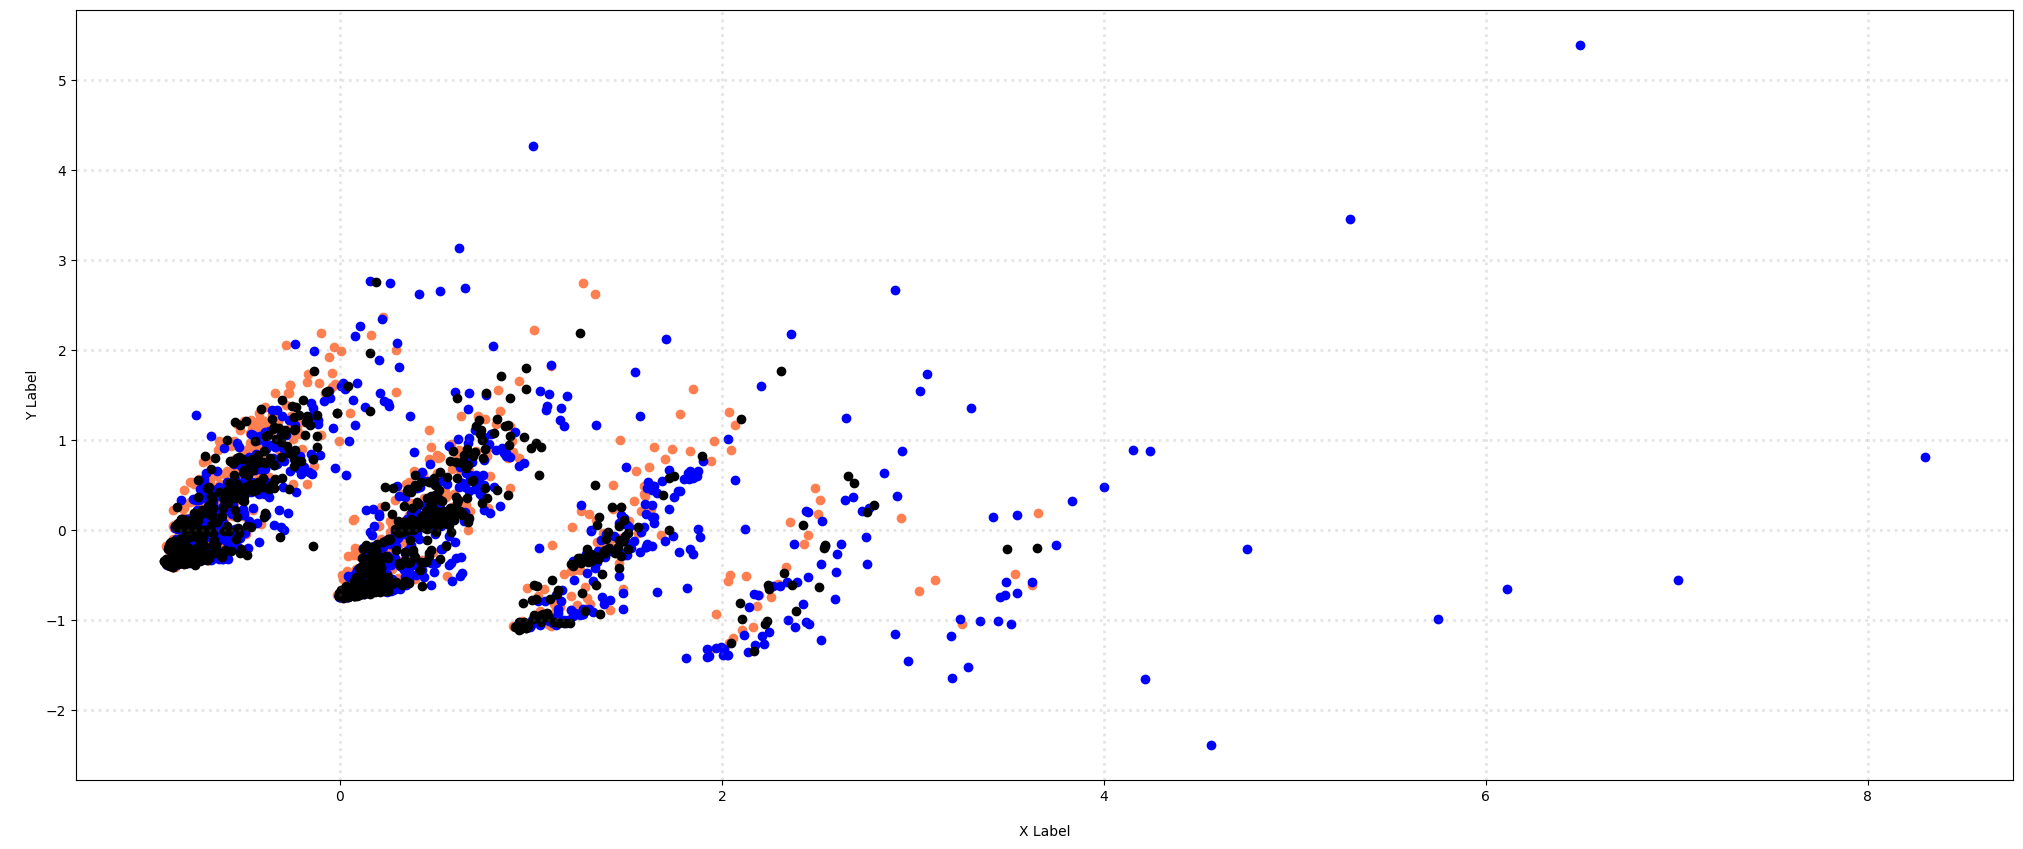

In [80]:
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### >>> Exercise 12 (take home):

C:\Users\penny\AppData\Local\Temp\ipykernel_26116\3616591510.py:12: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


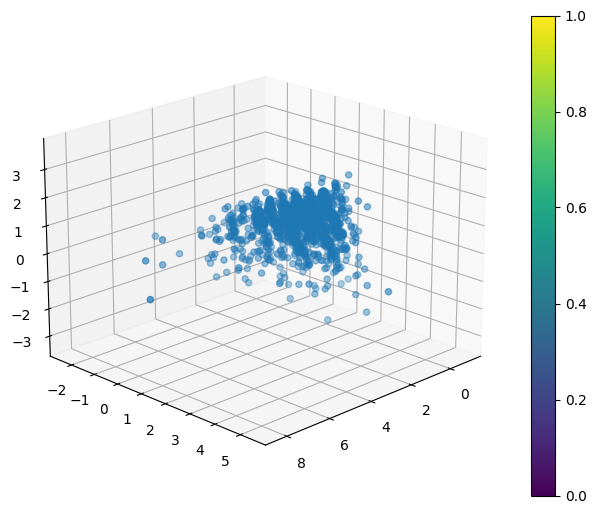

In [81]:
X_reduced_3d = PCA(n_components = 3).fit_transform(X_counts.toarray())
# X_reduced_3d.shape
from mpl_toolkits.mplot3d.axes3d import Axes3D

# 製作隨機50個點(x, y, z軸)範圍在1~50
x = X_reduced_3d.T[0]
y = X_reduced_3d.T[1]
z = X_reduced_3d.T[2]

# 製作figure
fig = plt.figure()
ax = Axes3D(fig)

#調整視角
ax.view_init(elev=20,     #仰角
             azim=45     #方位角
            )
            

color_map = plt.cm.get_cmap()
# 設定ax為散佈圖，製作color bar
map = ax.scatter(x, y, z, cmap=color_map)
fig.colorbar(map, ax = ax)



plt.show()

C:\Users\penny\AppData\Local\Temp\ipykernel_26116\1051323714.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


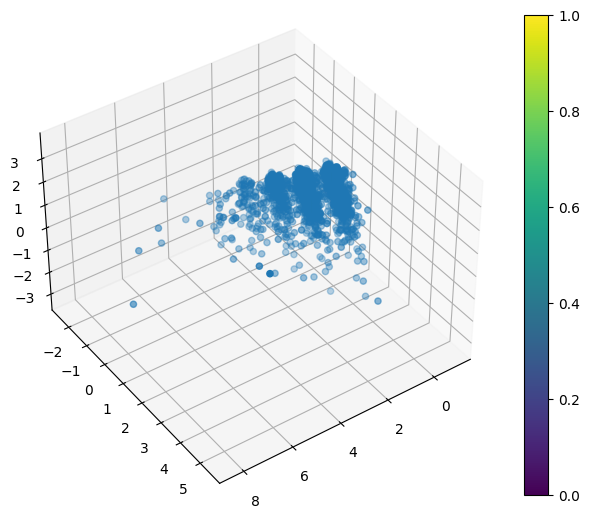

In [82]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

# 製作隨機50個點(x, y, z軸)範圍在1~50
x = X_reduced_3d.T[0]
y = X_reduced_3d.T[1]
z = X_reduced_3d.T[2]

# 製作figure
fig = plt.figure()
ax = Axes3D(fig)

#調整視角
ax.view_init(elev=40,     #仰角
             azim=55     #方位角
            )
            

color_map = plt.cm.get_cmap()
# 設定ax為散佈圖，製作color bar
map = ax.scatter(x, y, z, cmap=color_map)
fig.colorbar(map, ax = ax)



plt.show()

C:\Users\penny\AppData\Local\Temp\ipykernel_26116\1063838499.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


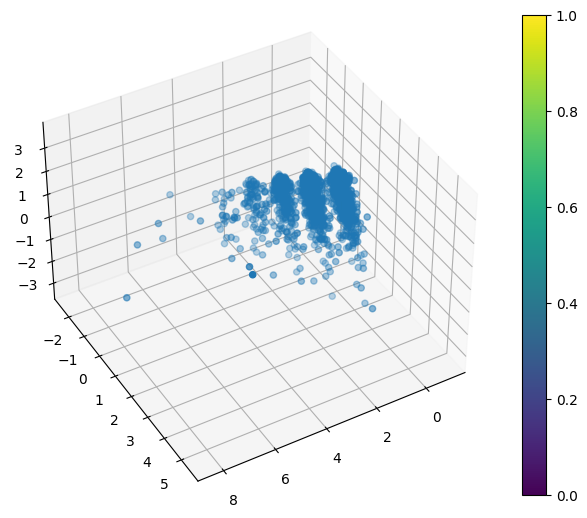

In [83]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

# 製作隨機50個點(x, y, z軸)範圍在1~50
x = X_reduced_3d.T[0]
y = X_reduced_3d.T[1]
z = X_reduced_3d.T[2]

# 製作figure
fig = plt.figure()
ax = Axes3D(fig)

#調整視角
ax.view_init(elev=40,     #仰角
             azim=60     #方位角
            )
            

color_map = plt.cm.get_cmap()
# 設定ax為散佈圖，製作color bar
map = ax.scatter(x, y, z, cmap=color_map)
fig.colorbar(map, ax = ax)



plt.show()

### 5.5 Attribute Transformation / Aggregation

In [84]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [85]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [86]:
term_frequencies[0] #sum of first term

1

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


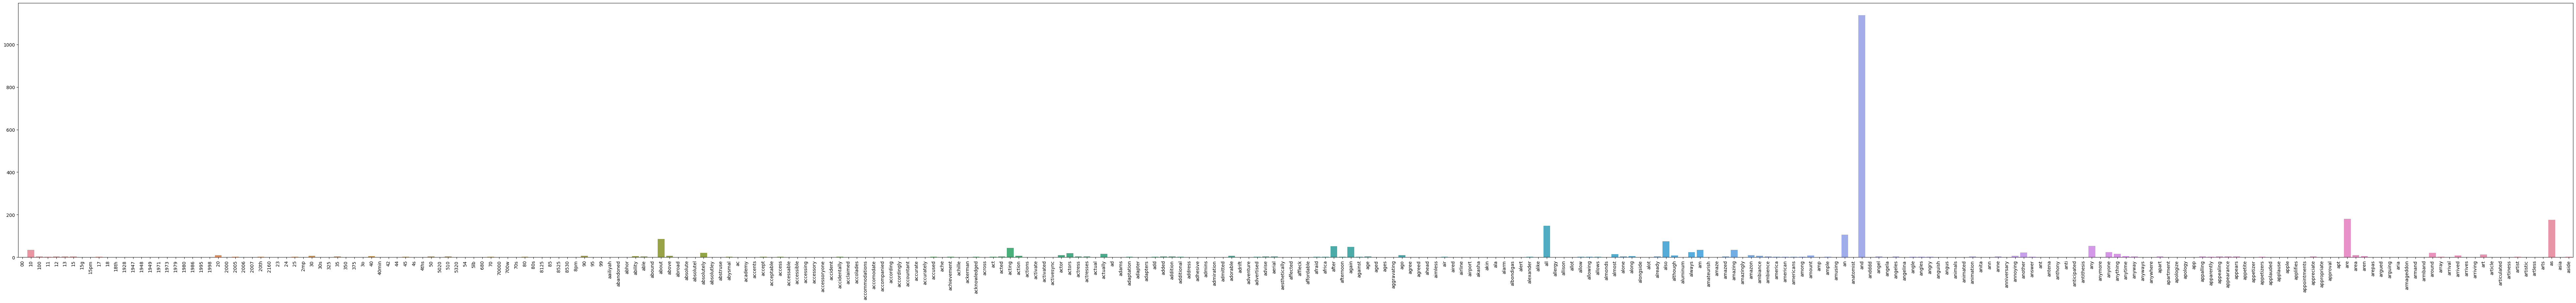

In [87]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

### >>> **Exercise 13 (take home)**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [88]:
import plotly.express as px
fig = px.bar( x=count_vect.get_feature_names_out()[:300],y=term_frequencies[:300], 
             labels={'y':'','x':''})
fig.show()

### >>> **Exercise 14 (take home)** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. 
* Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [89]:
term_frequencies_shift =  term_frequencies[:300] - 1
count_vect_new = []
term_frequencies_new = [] 
for vect , freq in zip(count_vect.get_feature_names_out()[:300],term_frequencies_shift):  
    if freq > 0:
        count_vect_new.append(vect)
        term_frequencies_new.append(freq)

[Text(0, 0, '10'),
 Text(1, 0, '100'),
 Text(2, 0, '11'),
 Text(3, 0, '12'),
 Text(4, 0, '13'),
 Text(5, 0, '15'),
 Text(6, 0, '17'),
 Text(7, 0, '20'),
 Text(8, 0, '2005'),
 Text(9, 0, '20th'),
 Text(10, 0, '25'),
 Text(11, 0, '30'),
 Text(12, 0, '35'),
 Text(13, 0, '40'),
 Text(14, 0, '45'),
 Text(15, 0, '50'),
 Text(16, 0, '510'),
 Text(17, 0, '70'),
 Text(18, 0, '80'),
 Text(19, 0, '90'),
 Text(20, 0, 'ability'),
 Text(21, 0, 'able'),
 Text(22, 0, 'about'),
 Text(23, 0, 'above'),
 Text(24, 0, 'absolutely'),
 Text(25, 0, 'abysmal'),
 Text(26, 0, 'accept'),
 Text(27, 0, 'access'),
 Text(28, 0, 'accidentally'),
 Text(29, 0, 'accused'),
 Text(30, 0, 'achievement'),
 Text(31, 0, 'acknowledged'),
 Text(32, 0, 'act'),
 Text(33, 0, 'acted'),
 Text(34, 0, 'acting'),
 Text(35, 0, 'action'),
 Text(36, 0, 'actor'),
 Text(37, 0, 'actors'),
 Text(38, 0, 'actress'),
 Text(39, 0, 'actresses'),
 Text(40, 0, 'actually'),
 Text(41, 0, 'adaptation'),
 Text(42, 0, 'add'),
 Text(43, 0, 'added'),
 Text(4

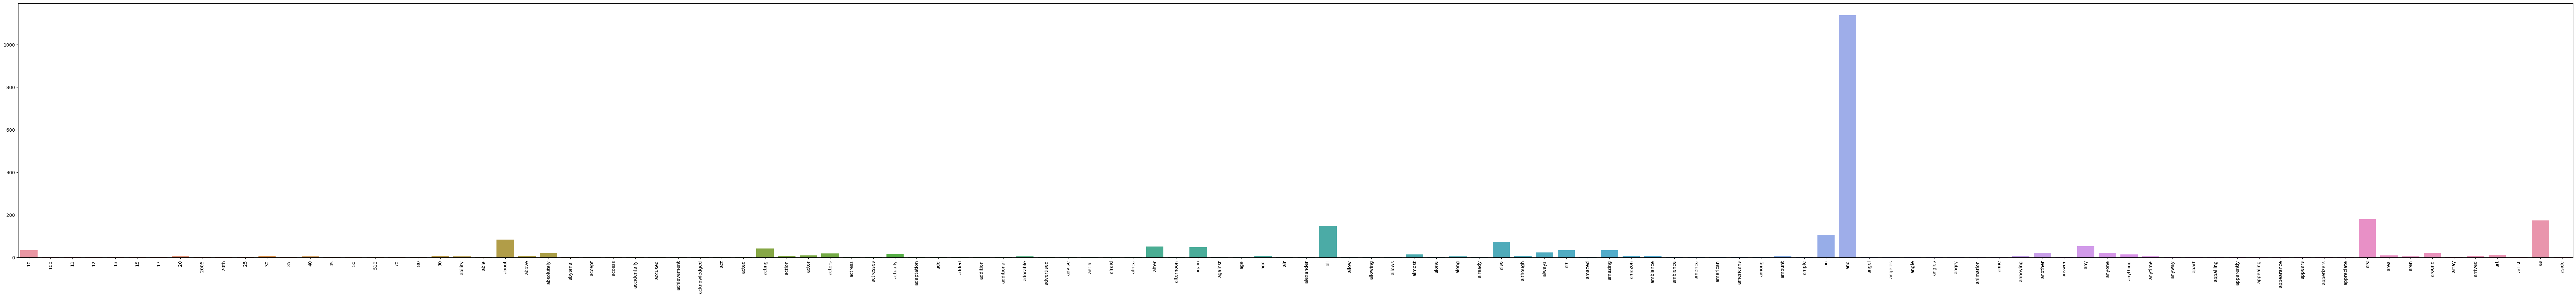

In [90]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect_new, 
            y=term_frequencies_new)
g.set_xticklabels(count_vect_new, rotation = 90)

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [91]:
count_vect_sorted, term_frequencies_sorted = (list(t) for t in zip(*sorted(zip( term_frequencies[:300], count_vect.get_feature_names_out()[:300]))))

[Text(0, 0, 'and'),
 Text(1, 0, 'are'),
 Text(2, 0, 'as'),
 Text(3, 0, 'all'),
 Text(4, 0, 'an'),
 Text(5, 0, 'about'),
 Text(6, 0, 'also'),
 Text(7, 0, 'any'),
 Text(8, 0, 'after'),
 Text(9, 0, 'again'),
 Text(10, 0, 'acting'),
 Text(11, 0, 'am'),
 Text(12, 0, 'amazing'),
 Text(13, 0, '10'),
 Text(14, 0, 'always'),
 Text(15, 0, 'anyone'),
 Text(16, 0, 'another'),
 Text(17, 0, 'around'),
 Text(18, 0, 'absolutely'),
 Text(19, 0, 'actors'),
 Text(20, 0, 'actually'),
 Text(21, 0, 'anything'),
 Text(22, 0, 'almost'),
 Text(23, 0, 'art'),
 Text(24, 0, 'area'),
 Text(25, 0, 'actor'),
 Text(26, 0, 'amazon'),
 Text(27, 0, 'ago'),
 Text(28, 0, '20'),
 Text(29, 0, 'arrived'),
 Text(30, 0, 'amount'),
 Text(31, 0, 'although'),
 Text(32, 0, 'annoying'),
 Text(33, 0, 'ambiance'),
 Text(34, 0, 'action'),
 Text(35, 0, 'above'),
 Text(36, 0, '90'),
 Text(37, 0, '30'),
 Text(38, 0, 'adorable'),
 Text(39, 0, 'aren'),
 Text(40, 0, 'anytime'),
 Text(41, 0, 'along'),
 Text(42, 0, 'ability'),
 Text(43, 0, '4

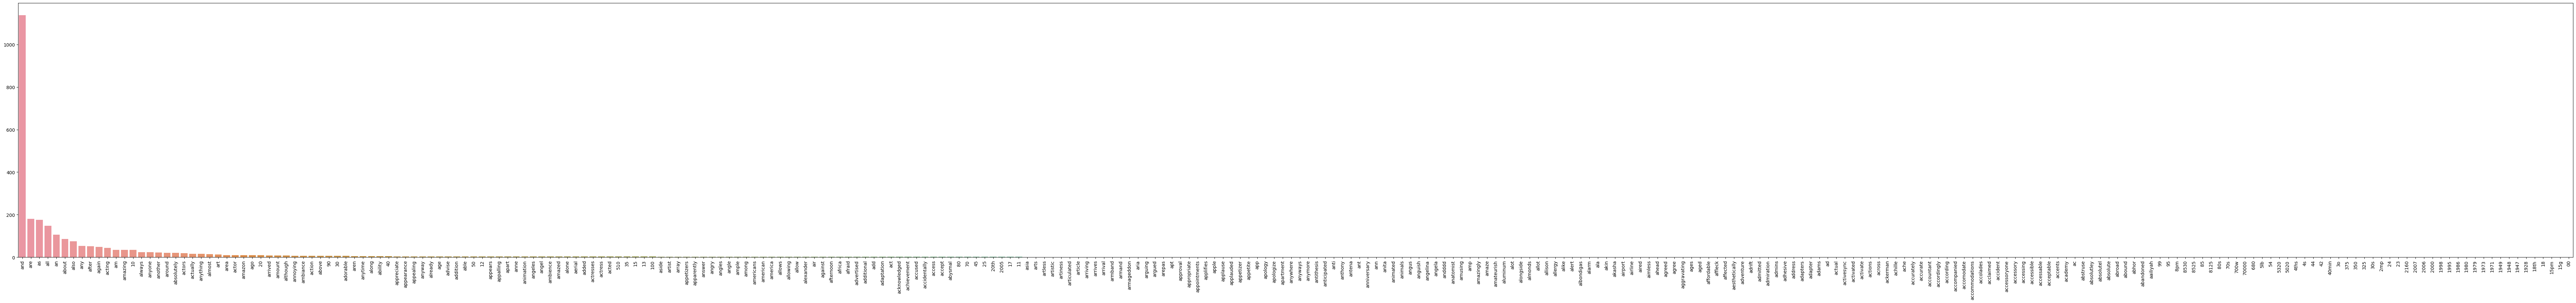

In [92]:
count_vect_sorted.reverse()
term_frequencies_sorted.reverse()
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=term_frequencies_sorted, 
            y=count_vect_sorted)
g.set_xticklabels(term_frequencies_sorted, rotation = 90)

### 5.6 Discretization and Binarization

In [93]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [94]:
mlb = preprocessing.LabelBinarizer()

In [95]:
mlb.fit(X.score)

LabelBinarizer()

In [96]:
X['bin_score'] = mlb.transform(X['score']).tolist()

In [97]:
X[0:9]

,sentence,score,category_name,unigrams,bin_score
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,amazon_cells_labelled,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,amazon_cells_labelled,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,amazon_cells_labelled,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,amazon_cells_labelled,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,amazon_cells_labelled,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,amazon_cells_labelled,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,amazon_cells_labelled,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


### >>> **Exercise 16 (take home)**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [98]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['category_name_transform'] = mlb.transform(X['category_name']).tolist()
X
# It works !

,sentence,score,category_name,unigrams,bin_score,category_name_transform
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled,"[So, there, is, no, way, for, me, to, plug, it...",[0],"[1, 0, 0]"
1,"Good case, Excellent value.",1,amazon_cells_labelled,"[Good, case, ,, Excellent, value, .]",[1],"[1, 0, 0]"
2,Great for the jawbone.,1,amazon_cells_labelled,"[Great, for, the, jawbone, .]",[1],"[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled,"[Tied, to, charger, for, conversations, lastin...",[0],"[1, 0, 0]"
4,The mic is great.,1,amazon_cells_labelled,"[The, mic, is, great, .]",[1],"[1, 0, 0]"
...,...,...,...,...,...,...
2995,I think food should have flavor and texture an...,0,yelp_labelled,"[I, think, food, should, have, flavor, and, te...",[0],"[0, 0, 1]"
2996,Appetite instantly gone.,0,yelp_labelled,"[Appetite, instantly, gone, .]",[0],"[0, 0, 1]"
2997,Overall I was not impressed and would not go b...,0,yelp_labelled,"[Overall, I, was, not, impressed, and, would, ...",[0],"[0, 0, 1]"
2998,"The whole experience was underwhelming, and I ...",0,yelp_labelled,"[The, whole, experience, was, underwhelming, ,...",[0],"[0, 0, 1]"


# 6. Data Exploration

In [99]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [100]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [101]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [102]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


____
## 3. Third: 
   please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
   *  Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
   *  Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
   * Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


In [103]:
#  Generate meaningful new data visualizations.
int_score = []
for i in X['score']:
    int_score.append(int(i))
X['score'] = int_score

In [104]:
sentence_len = []
for i in X['sentence']:
    sentence_len.append(len(i))
X['sentence_len'] = sentence_len

In [105]:
X

,sentence,score,category_name,unigrams,bin_score,category_name_transform,sentence_len
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled,"[So, there, is, no, way, for, me, to, plug, it...",[0],"[1, 0, 0]",82
1,"Good case, Excellent value.",1,amazon_cells_labelled,"[Good, case, ,, Excellent, value, .]",[1],"[1, 0, 0]",27
2,Great for the jawbone.,1,amazon_cells_labelled,"[Great, for, the, jawbone, .]",[1],"[1, 0, 0]",22
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled,"[Tied, to, charger, for, conversations, lastin...",[0],"[1, 0, 0]",79
4,The mic is great.,1,amazon_cells_labelled,"[The, mic, is, great, .]",[1],"[1, 0, 0]",17
...,...,...,...,...,...,...,...
2995,I think food should have flavor and texture an...,0,yelp_labelled,"[I, think, food, should, have, flavor, and, te...",[0],"[0, 0, 1]",66
2996,Appetite instantly gone.,0,yelp_labelled,"[Appetite, instantly, gone, .]",[0],"[0, 0, 1]",24
2997,Overall I was not impressed and would not go b...,0,yelp_labelled,"[Overall, I, was, not, impressed, and, would, ...",[0],"[0, 0, 1]",50
2998,"The whole experience was underwhelming, and I ...",0,yelp_labelled,"[The, whole, experience, was, underwhelming, ,...",[0],"[0, 0, 1]",91


<AxesSubplot:xlabel='score', ylabel='sentence_len'>

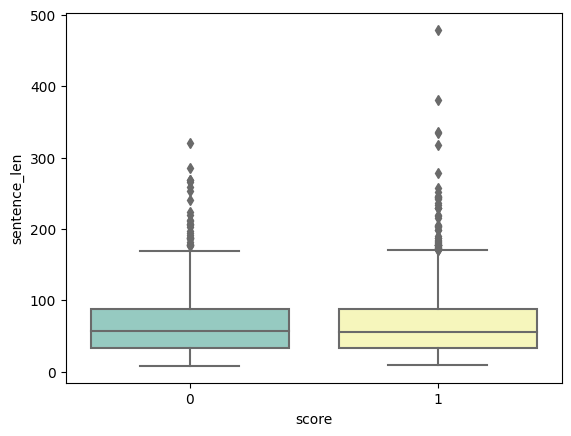

In [106]:
# new data visualizations
# X['score'].plot()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='score',y='sentence_len',data=X,palette="Set3")
# pd.crosstab(X['category_name'],X['score']).plot.bar(stacked=True)

<AxesSubplot:xlabel='score', ylabel='sentence_len'>

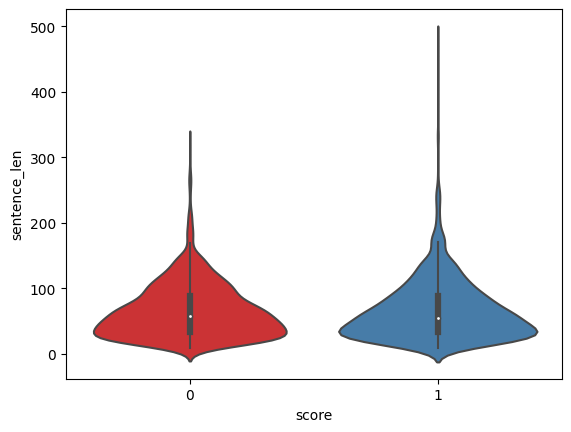

In [107]:
sns.violinplot(x='score',y='sentence_len',data=X,palette="Set1")

* Generate **TF-IDF features** from the tokens of each text. 
* This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .

In [108]:
X['category_name'][1400]

'imdb_labelled'

In [109]:
#  Generate TF-IDF features from the tokens of each text.
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
TF_IDF_features = vectorizer.fit_transform(X['sentence'])
vectorizer.get_feature_names_out()

array(['00', '10', '100', ..., 'zillion', 'zombie', 'zombiez'],
      dtype=object)

In [110]:
TF_IDF_features.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

  * Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories.
  * Use both the TF-IDF features and word frequency features to build two seperate classifiers. 
  * Comment on the differences.  
  * Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


In [111]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer


In [112]:
#  Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories.
category_name_transform_number = []
for i in X['category_name_transform']:
    category_name_transform_number.append(i[0]*1 + i[1]*2 + i[2]*3 )
X['category_name_transform_number'] = category_name_transform_number

* TF-IDF features

In [113]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf = clf.fit(TF_IDF_features.toarray(), category_name_transform_number)
# clf = clf.fit(iris.data, iris.target)
y_pred=clf.predict(X_counts.toarray())
y_pred

array([3, 1, 1, ..., 3, 3, 3])

In [114]:
TF_IDF_features_predict_Naive_Bayes_classifier = []
for i in y_pred:
    if i == 1:
        TF_IDF_features_predict_Naive_Bayes_classifier.append('amazon_cells_labelled')
    if i == 2:
        TF_IDF_features_predict_Naive_Bayes_classifier.append('imdb_labelled')
    if i == 3:
        TF_IDF_features_predict_Naive_Bayes_classifier.append('yelp_labelled')
        
X['TF_IDF_features_predict_Naive_Bayes_classifier'] = TF_IDF_features_predict_Naive_Bayes_classifier

* frequency features

In [115]:
# from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf = clf.fit(X_counts.toarray(), category_name_transform_number)
y_pred=clf.predict(X_counts.toarray())
y_pred

array([3, 1, 1, ..., 3, 3, 3])

In [116]:
Frequency_Naive_Bayes_classifier_predict = []
for i in y_pred:
    if i == 1:
        Frequency_Naive_Bayes_classifier_predict.append('amazon_cells_labelled')
    if i == 2:
        Frequency_Naive_Bayes_classifier_predict.append('imdb_labelled')
    if i == 3:
        Frequency_Naive_Bayes_classifier_predict.append('yelp_labelled')
X['Frequency_Naive_Bayes_classifier_predict'] = Frequency_Naive_Bayes_classifier_predict

In [117]:
X

,sentence,score,category_name,unigrams,bin_score,category_name_transform,sentence_len,category_name_transform_number,TF_IDF_features_predict_Naive_Bayes_classifier,Frequency_Naive_Bayes_classifier_predict
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled,"[So, there, is, no, way, for, me, to, plug, it...",[0],"[1, 0, 0]",82,1,yelp_labelled,yelp_labelled
1,"Good case, Excellent value.",1,amazon_cells_labelled,"[Good, case, ,, Excellent, value, .]",[1],"[1, 0, 0]",27,1,amazon_cells_labelled,amazon_cells_labelled
2,Great for the jawbone.,1,amazon_cells_labelled,"[Great, for, the, jawbone, .]",[1],"[1, 0, 0]",22,1,amazon_cells_labelled,amazon_cells_labelled
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled,"[Tied, to, charger, for, conversations, lastin...",[0],"[1, 0, 0]",79,1,amazon_cells_labelled,amazon_cells_labelled
4,The mic is great.,1,amazon_cells_labelled,"[The, mic, is, great, .]",[1],"[1, 0, 0]",17,1,amazon_cells_labelled,amazon_cells_labelled
...,...,...,...,...,...,...,...,...,...,...
2995,I think food should have flavor and texture an...,0,yelp_labelled,"[I, think, food, should, have, flavor, and, te...",[0],"[0, 0, 1]",66,3,yelp_labelled,yelp_labelled
2996,Appetite instantly gone.,0,yelp_labelled,"[Appetite, instantly, gone, .]",[0],"[0, 0, 1]",24,3,yelp_labelled,yelp_labelled
2997,Overall I was not impressed and would not go b...,0,yelp_labelled,"[Overall, I, was, not, impressed, and, would, ...",[0],"[0, 0, 1]",50,3,yelp_labelled,yelp_labelled
2998,"The whole experience was underwhelming, and I ...",0,yelp_labelled,"[The, whole, experience, was, underwhelming, ,...",[0],"[0, 0, 1]",91,3,yelp_labelled,yelp_labelled


In [118]:
count_different = 0
for i , j in zip(X['TF_IDF_features_predict_Naive_Bayes_classifier'],X['Frequency_Naive_Bayes_classifier_predict']):
    if i != j:
        print(i,'                    ',j)
        count_different+=1

imdb_labelled                      amazon_cells_labelled
imdb_labelled                      amazon_cells_labelled
imdb_labelled                      amazon_cells_labelled
amazon_cells_labelled                      yelp_labelled
imdb_labelled                      amazon_cells_labelled
amazon_cells_labelled                      yelp_labelled
amazon_cells_labelled                      yelp_labelled
amazon_cells_labelled                      yelp_labelled
imdb_labelled                      yelp_labelled
imdb_labelled                      amazon_cells_labelled
imdb_labelled                      yelp_labelled
amazon_cells_labelled                      yelp_labelled
amazon_cells_labelled                      yelp_labelled
yelp_labelled                      amazon_cells_labelled
yelp_labelled                      amazon_cells_labelled
yelp_labelled                      amazon_cells_labelled
imdb_labelled                      amazon_cells_labelled
amazon_cells_labelled                      yelp

In [119]:
count_different
# 總共會有66個地方不一樣

66

In [123]:
type(X_counts.toarray()[0][0])

numpy.int64

In [124]:
type(TF_IDF_features.toarray()[0][0])

numpy.float64

In [125]:
# 他們倆個一個是 numpy.int64 一個是 numpy.float64， 所以不一樣。

_____

## 4. Fourth: 
* In the lab, we applied each step really quickly just to illustrate how to work with your dataset. 
* There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. 
* What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__

## Ans : 
* 因為第四部份會用到 lab 的 code 和 data，所以我把它獨立出來，放在同個資料夾底下，並取名為 `DM2022-Lab1-Homework_part4.ipynb`。
* 其相對路徑為 : `DMLab1\DM2022-Lab1-Homework\DM2022-Lab1-Homework.ipynb` 。